In [49]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle
import time
import keras
from neural_net import preprocess_for_neural_net
from neural_net import neural_network

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

# Neural Net

In [50]:
path_dataset = "./data/data_train.csv"
dataset = pd.read_csv(path_dataset,encoding='utf-8')
dataset = preprocess_for_neural_net(dataset)
n_users, n_movies = len(dataset.user.unique()), len(dataset.movie.unique())
train, valid = train_test_split(dataset, test_size=0.1)

Train on 1059256 samples, validate on 117696 samples
Epoch 1/26
1059256/1059256 [==============================] - 8s 8us/step - loss: 2.7157 - acc: 0.2566 - val_loss: 1.0715 - val_acc: 0.3038
Epoch 2/26
1059256/1059256 [==============================] - 7s 7us/step - loss: 1.6367 - acc: 0.2964 - val_loss: 1.0403 - val_acc: 0.3113
Epoch 3/26
1059256/1059256 [==============================] - 7s 6us/step - loss: 1.5052 - acc: 0.3080 - val_loss: 1.0278 - val_acc: 0.3142
Epoch 4/26
1059256/1059256 [==============================] - 7s 7us/step - loss: 1.4012 - acc: 0.3174 - val_loss: 1.0186 - val_acc: 0.3150
Epoch 5/26
1059256/1059256 [==============================] - 7s 6us/step - loss: 1.3101 - acc: 0.3249 - val_loss: 1.0135 - val_acc: 0.3158
Epoch 6/26
1059256/1059256 [==============================] - 7s 6us/step - loss: 1.2369 - acc: 0.3320 - val_loss: 1.0117 - val_acc: 0.3178
Epoch 7/26
1059256/1059256 [==============================] - 7s 6us/step - loss: 1.1743 - acc: 0.3373 - va

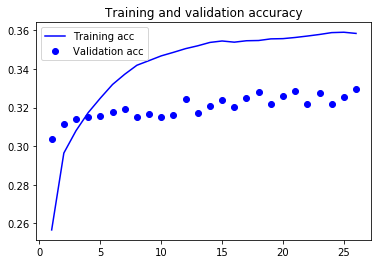

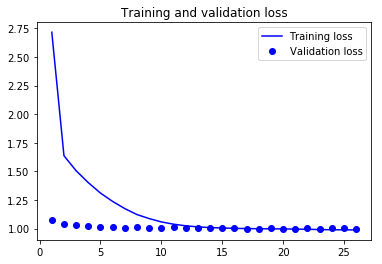

In [64]:
model = neural_network(n_users, n_movies, n_latent_factors_user = 5, n_latent_factors_movie = 5)
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),loss= 'mean_squared_error',metrics = ['acc'])
history = model.fit([train.user, train.movie],train.rating , epochs=26, verbose=1, batch_size=256,
                    validation_data = ([valid.user, valid.movie],valid.rating))
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [65]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 5)         5005        Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 5)         50005       User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [66]:
model.save('/home/neeraj/Documents/my-recommender-system/m5.h5')

# SVD

In [13]:
from surprise.model_selection import train_test_split
reader = Reader(rating_scale = (1,5))
data = Dataset.load_from_df(dataset,reader)
train_data, validation_data = train_test_split(data, test_size=0.2)
model_svd = SVD(n_factors=105, n_epochs = 25, reg_all = 0.05)
model_svd.fit(train_data)
validation_label = model_svd.test(validation_data)
accuracy.rmse(validation_label, verbose=True)

RMSE: 0.9958


0.9958023086755949

# SVD++

In [26]:
from surprise import SVDpp
model_svdp = SVDpp(n_factors=22, n_epochs = 15, reg_all = 0.04)
model_svdp.fit(train_data)
validation_label = model_svdp.test(validation_data)
accuracy.rmse(validation_label, verbose=True)

RMSE: 0.9960


0.9959580744487727

# XGBOOST

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
features = ['user','movie']
clf_xgb = xgb.XGBClassifier(n_estimators=100,depth=6,subsample=0.5,learning_rate=0.1)
clf_xgb.fit(train[features],train['rating'])
print('Training Accuracy',np.sqrt(mean_squared_error(train['rating'], clf_xgb.predict(train[features]))))
print('Validation Accuracy ',np.sqrt(mean_squared_error(valid['rating'], clf_xgb.predict(valid[features]))))

Training Accuracy 1.4798898528104705
Validation Accuracy  1.4767576922687158
